In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Maybank.csv')

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/4/2010,6.85,6.88,6.84,6.86,3.000736,3049400.0
1,1/5/2010,6.89,6.96,6.89,6.90,3.018232,8532800.0
2,1/6/2010,6.91,6.96,6.88,6.90,3.018232,7817200.0
3,1/7/2010,6.89,6.91,6.88,6.88,3.009484,8194400.0
4,1/8/2010,6.93,6.93,6.87,6.92,3.026981,5917000.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2470 entries, 0 to 2469
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2470 non-null   object 
 1   Open       2469 non-null   float64
 2   High       2469 non-null   float64
 3   Low        2469 non-null   float64
 4   Close      2469 non-null   float64
 5   Adj Close  2469 non-null   float64
 6   Volume     2469 non-null   float64
dtypes: float64(6), object(1)
memory usage: 135.2+ KB


### Preprocessing

In [5]:
data = data.dropna()

In [6]:
# Preprocess and normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['Close']])

# Define the look_back window and create input-output pairs
look_back = 30
X, y = [], []
for i in range(len(scaled_data) - look_back):
    X.append(scaled_data[i:i+look_back].flatten())
    y.append(scaled_data[i+look_back][0])

X = np.array(X)
y = np.array(y)

In [7]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [8]:
# Build the neural network model
model = Sequential([
    Dense(units=64, activation='tanh', input_dim=look_back),
    Dense(units=60, activation='tanh'),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=3000, validation_split=0.1)

Epoch 1/3000
55/55 [==============================] - 1s 5ms/step - loss: 0.0979 - val_loss: 0.0020
Epoch 2/3000
55/55 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0011
Epoch 3/3000
55/55 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 7.4008e-04
Epoch 4/3000
55/55 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 5.7167e-04
Epoch 5/3000
55/55 [==============================] - 0s 2ms/step - loss: 9.7714e-04 - val_loss: 5.9328e-04
Epoch 6/3000
55/55 [==============================] - 0s 2ms/step - loss: 9.6588e-04 - val_loss: 4.7637e-04
Epoch 7/3000
55/55 [==============================] - 0s 2ms/step - loss: 8.9780e-04 - val_loss: 5.9211e-04
Epoch 8/3000
55/55 [==============================] - 0s 4ms/step - loss: 8.6238e-04 - val_loss: 5.0499e-04
Epoch 9/3000
55/55 [==============================] - 0s 2ms/step - loss: 8.5533e-04 - val_loss: 5.2059e-04
Epoch 10/3000
55/55 [==============================]

16/16 [==============================] - 0s 1ms/step
Mean Squared Error: 0.0078


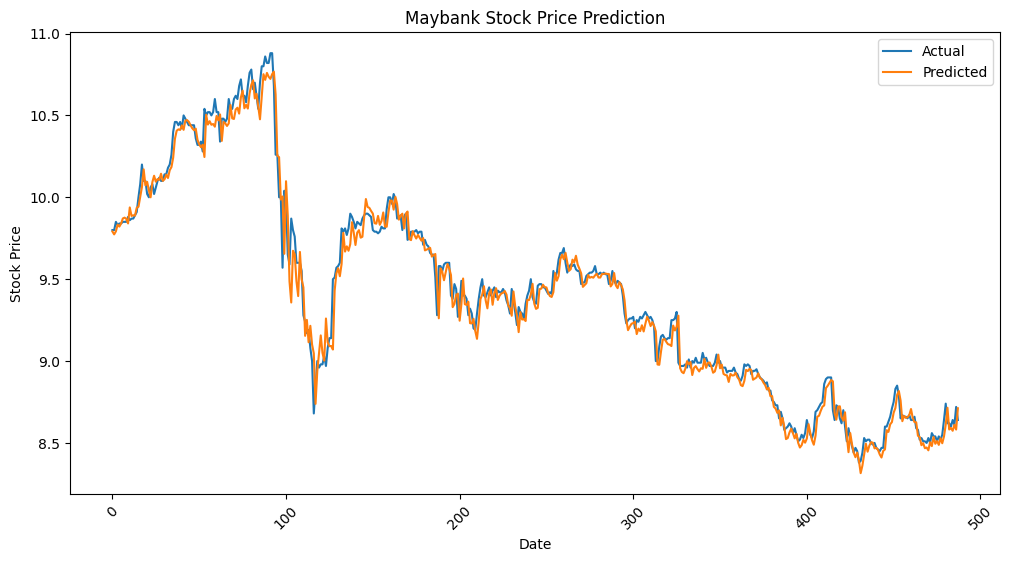

In [9]:
# Make predictions
predictions = model.predict(x_test)

# Inverse transform the predictions and actual values to their original scales
predictions = scaler.inverse_transform(predictions)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error
mse = mean_squared_error(y_test_original, predictions)
print(f"Mean Squared Error: {mse:.4f}")

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('Maybank Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()